**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import time

from tensorflow import keras
from keras import *

**DATA VISUALISATION**

In [2]:
# load the data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# train validation split and normalize
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state = 1)
train_images, val_images, test_images = train_images/255.0, val_images/255.0, test_images/255.0

# check dimensions
tf.print("Dimension of train images set:", train_images.shape)
tf.print("Dimension of valid images set:", val_images.shape)
tf.print("Dimension of test images set:", test_images.shape)

Dimension of train images set: (40000, 32, 32, 3)
Dimension of valid images set: (10000, 32, 32, 3)
Dimension of test images set: (10000, 32, 32, 3)


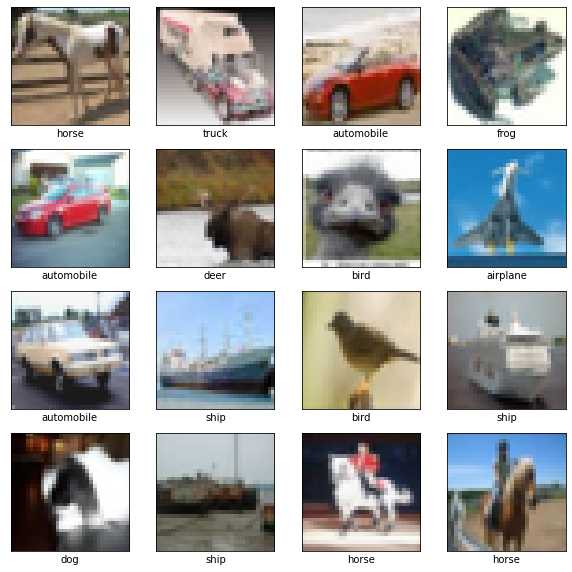

In [3]:
# visualize the data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**2 CLASS DATA TRUNCATION**

In [4]:
# load the data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# select 2 classes from the data
tr_ind1 = np.where(train_labels == 0)[0]
tr_ind2 = np.where(train_labels == 1)[0]
train_2_images = np.append(train_images[tr_ind1], train_images[tr_ind2], axis = 0)
train_2_labels = np.append(train_labels[tr_ind1], train_labels[tr_ind2], axis = 0)

ts_ind1 = np.where(test_labels == 0)[0]
ts_ind2 = np.where(test_labels == 1)[0]
test_2_images = np.append(test_images[ts_ind1], test_images[ts_ind2], axis = 0)
test_2_labels = np.append(test_labels[ts_ind1], test_labels[ts_ind2], axis = 0)

# train validation split and normalize
train_2_images, val_2_images, train_2_labels, val_2_labels = train_test_split(train_2_images, train_2_labels, test_size=0.2, random_state = 1)
train_2_images, val_2_images, test_2_images = train_2_images/255.0, val_2_images/255.0, test_2_images/255.0

# check dimensions
tf.print("Dimension of 2-class train images set:", train_2_images.shape)
tf.print("Dimension of 2-class valid images set:", val_2_images.shape)
tf.print("Dimension of 2-class test images set:", test_2_images.shape)

Dimension of 2-class train images set: (8000, 32, 32, 3)
Dimension of 2-class valid images set: (2000, 32, 32, 3)
Dimension of 2-class test images set: (2000, 32, 32, 3)


# **MODEL 1**

**WITHOUT DROPOUT**

In [ ]:
# kernel size 1
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 2)
model1_1 = models.Sequential()
model1_1.add(layers.Conv2D(32, (1, 1), activation = 'relu', input_shape=(32, 32, 3)))
model1_1.add(layers.MaxPooling2D((2, 2)))
model1_1.add(layers.Flatten())
model1_1.add(layers.Dense(512, activation = 'relu'))
model1_1.add(layers.Dense(2, activation = 'softmax'))
model1_1.summary()
model1_1.compile(optimizer = 'RMSprop', loss = losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
history1_1 = model1_1.fit(train_2_images, train_2_labels, batch_size = 32, epochs = 25, validation_data = (val_2_images, val_2_labels), verbose = 2, callbacks = [callback])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1026      
Total params: 4,195,970
Trainable params: 4,195,970
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
250/250 - 14s - loss: 0.7400 - accuracy: 0.5679 - val_loss: 0.5237 - val_accuracy: 0.7735
Epoch 2/2

In [ ]:
# kernel size 3
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 2)
model1_2 = models.Sequential()
model1_2.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(32, 32, 3)))
model1_2.add(layers.MaxPooling2D((2, 2)))
model1_2.add(layers.Flatten())
model1_2.add(layers.Dense(512, activation = 'relu'))
model1_2.add(layers.Dense(2, activation = 'softmax'))
model1_2.summary()
model1_2.compile(optimizer = 'RMSprop', loss = losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
history1_2 = model1_2.fit(train_2_images, train_2_labels, batch_size = 32, epochs = 25, validation_data = (val_2_images, val_2_labels), verbose = 2, callbacks = [callback])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               3686912   
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 1026      
Total params: 3,688,834
Trainable params: 3,688,834
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
250/250 - 14s - loss: 0.5261 - accuracy: 0.7814 - val_loss: 0.4488 - val_accuracy: 0.8585
Epoch 2/2

In [ ]:
# kernet size 5
model1_3 = models.Sequential()
model1_3.add(layers.Conv2D(32, (5, 5), activation = 'relu', input_shape=(32, 32, 3)))
model1_3.add(layers.MaxPooling2D((2, 2)))
model1_3.add(layers.Flatten())
model1_3.add(layers.Dense(512, activation = 'relu'))
model1_3.add(layers.Dense(2, activation = 'softmax'))
model1_3.summary()
model1_3.compile(optimizer = 'RMSprop', loss = losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
history1_3 = model1_3.fit(train_2_images, train_2_labels, batch_size = 32, epochs = 25, validation_data = (val_2_images, val_2_labels), verbose = 2, callbacks = [callback])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               3211776   
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 1026      
Total params: 3,215,234
Trainable params: 3,215,234
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
250/250 - 14s - loss: 0.8112 - accuracy: 0.5014 - val_loss: 0.8238 - val_accuracy: 0.4895
Epoch 2/2

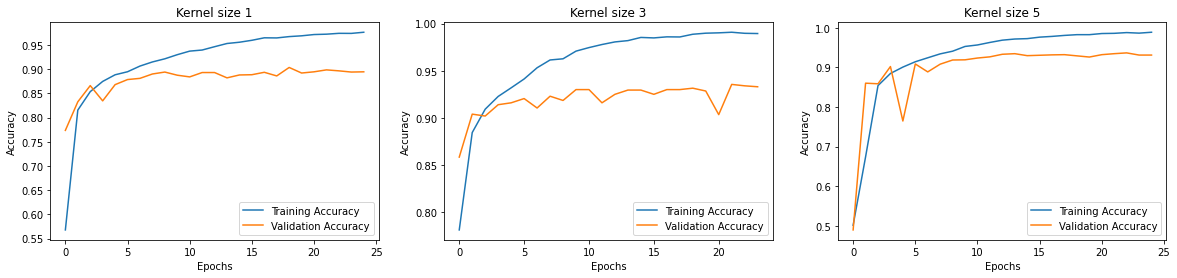

In [ ]:
fig = plt.figure(figsize=(20,4))

ax1 = fig.add_subplot(1,3,1)
ax1.plot(history1_1.history['accuracy'], label = "Training Accuracy")
ax1.plot(history1_1.history['val_accuracy'], label = "Validation Accuracy")
ax1.set_title("Kernel size 1")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend(loc = 'best')

ax2 = fig.add_subplot(1,3,2)
ax2.plot(history1_2.history['accuracy'], label = "Training Accuracy")
ax2.plot(history1_2.history['val_accuracy'], label = "Validation Accuracy")
ax2.set_title("Kernel size 3")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend(loc = 'best')

ax3 = fig.add_subplot(1,3,3)
ax3.plot(history1_3.history['accuracy'], label = "Training Accuracy")
ax3.plot(history1_3.history['val_accuracy'], label = "Validation Accuracy")
ax3.set_title("Kernel size 5")
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Accuracy")
ax3.legend(loc = 'best')

plt.show()

In [ ]:
loss1_1, acc1_1 = model1_1.evaluate(test_2_images, test_2_labels, verbose = 2)
loss1_2, acc1_2 = model1_2.evaluate(test_2_images, test_2_labels, verbose = 2)
loss1_3, acc1_3 = model1_3.evaluate(test_2_images, test_2_labels, verbose = 2)

63/63 - 1s - loss: 0.4003 - accuracy: 0.9115
63/63 - 1s - loss: 0.3732 - accuracy: 0.9365
63/63 - 1s - loss: 0.3872 - accuracy: 0.9215


**Observations** <br>
With kernel size 1, there is effectively no convolution so it has the least accuracy. With kernel size 3, the CNN is able to extract features from the images and gives a better accuracy. With kernel size 5, fine details are missed out by CN so accuracy decreases slightly as compared to previous case. Thus, overall all give comparable results with CNN having kernel size 3 performing the best.


**WITH DROPOUT**

In [53]:
# kernel size 1
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 2)
model1_1 = models.Sequential()
model1_1.add(layers.Conv2D(32, (1, 1), activation = 'relu', input_shape=(32, 32, 3)))
model1_1.add(layers.Dropout(0.5))
model1_1.add(layers.MaxPooling2D((2, 2)))
model1_1.add(layers.Flatten())
model1_1.add(layers.Dense(512, activation = 'relu'))
model1_1.add(layers.Dense(2, activation = 'softmax'))
model1_1.summary()
model1_1.compile(optimizer = 'RMSprop', loss = losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
history1_1 = model1_1.fit(train_2_images, train_2_labels, batch_size = 32, epochs = 25, validation_data = (val_2_images, val_2_labels), verbose = 2, callbacks = [callback])

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 1026      
Total params: 4,195,970
Trainable params: 4,195,970
Non-trainable params: 0
___________________________________________

In [54]:
# kernel size 3
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 2)
model1_2 = models.Sequential()
model1_2.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(32, 32, 3)))
model1_2.add(layers.MaxPooling2D((2, 2)))
model1_2.add(layers.Dropout(0.5))
model1_2.add(layers.Flatten())
model1_2.add(layers.Dense(512, activation = 'relu'))
model1_2.add(layers.Dense(2, activation = 'softmax'))
model1_2.summary()
model1_2.compile(optimizer = 'RMSprop', loss = losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
history1_2 = model1_2.fit(train_2_images, train_2_labels, batch_size = 32, epochs = 25, validation_data = (val_2_images, val_2_labels), verbose = 2, callbacks = [callback])

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 7200)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               3686912   
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 1026      
Total params: 3,688,834
Trainable params: 3,688,834
Non-trainable params: 0
___________________________________________

In [55]:
# kernet size 5
model1_3 = models.Sequential()
model1_3.add(layers.Conv2D(32, (5, 5), activation = 'relu', input_shape=(32, 32, 3)))
model1_3.add(layers.MaxPooling2D((2, 2)))
model1_3.add(layers.Dropout(0.5))
model1_3.add(layers.Flatten())
model1_3.add(layers.Dense(512, activation = 'relu'))
model1_3.add(layers.Dense(2, activation = 'softmax'))
model1_3.summary()
model1_3.compile(optimizer = 'RMSprop', loss = losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
history1_3 = model1_3.fit(train_2_images, train_2_labels, batch_size = 32, epochs = 25, validation_data = (val_2_images, val_2_labels), verbose = 2, callbacks = [callback])

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               3211776   
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 1026      
Total params: 3,215,234
Trainable params: 3,215,234
Non-trainable params: 0
___________________________________________

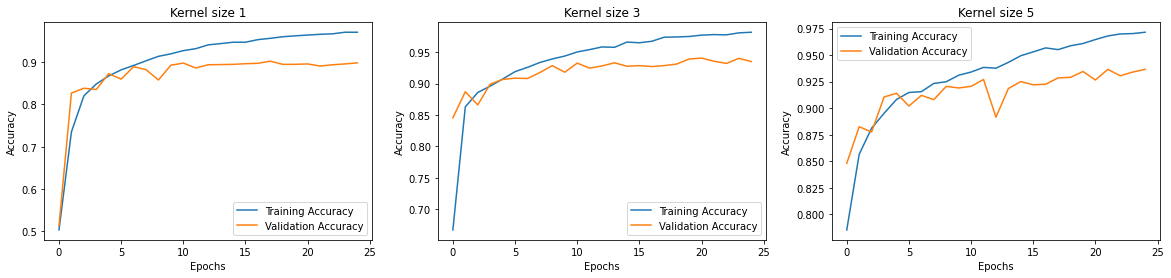

In [56]:
fig = plt.figure(figsize=(20,4))

ax1 = fig.add_subplot(1,3,1)
ax1.plot(history1_1.history['accuracy'], label = "Training Accuracy")
ax1.plot(history1_1.history['val_accuracy'], label = "Validation Accuracy")
ax1.set_title("Kernel size 1")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend(loc = 'best')

ax2 = fig.add_subplot(1,3,2)
ax2.plot(history1_2.history['accuracy'], label = "Training Accuracy")
ax2.plot(history1_2.history['val_accuracy'], label = "Validation Accuracy")
ax2.set_title("Kernel size 3")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend(loc = 'best')

ax3 = fig.add_subplot(1,3,3)
ax3.plot(history1_3.history['accuracy'], label = "Training Accuracy")
ax3.plot(history1_3.history['val_accuracy'], label = "Validation Accuracy")
ax3.set_title("Kernel size 5")
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Accuracy")
ax3.legend(loc = 'best')

plt.show()

In [57]:
loss1_1, acc1_1 = model1_1.evaluate(test_2_images, test_2_labels, verbose = 2)
loss1_2, acc1_2 = model1_2.evaluate(test_2_images, test_2_labels, verbose = 2)
loss1_3, acc1_3 = model1_3.evaluate(test_2_images, test_2_labels, verbose = 2)

63/63 - 1s - loss: 0.4016 - accuracy: 0.9080
63/63 - 1s - loss: 0.3691 - accuracy: 0.9410
63/63 - 1s - loss: 0.3740 - accuracy: 0.9370


**Observations** <br>
With kernel size 1, there is effectively no convolution so it has the least accuracy. With kernel size 3, the CNN is able to extract features from the images and gives a better accuracy. With kernel size 5, fine details are missed out by CN so accuracy decreases slightly as compared to previous case. Thus, overall all give comparable results with CNN having kernel size 3 performing the best. 
<br>
<br>
Also, on adding Dropout reguralisation, the results improve slightly. So for further analysis, the CNN with kernel size 3 and dropout is taken as the Model 1. 




# **Model 2**

In [37]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 2)
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (1,1), activation = 'relu', input_shape=(32, 32, 3)))
model2.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model2.add(layers.Conv2D(32, (5,5), activation = 'relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.5))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation = 'relu'))
model2.add(layers.Dense(2, activation = 'softmax'))
model2.summary()
model2.compile(optimizer = 'RMSprop', loss = losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
history2 = model2.fit(train_2_images, train_2_labels, epochs = 25, validation_data = (val_2_images, val_2_labels), verbose = 2)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 26, 26, 32)        25632     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)             

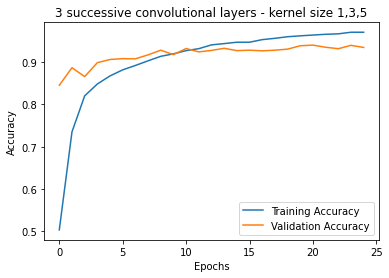

In [62]:
plt.plot(history2.history['accuracy'], label = "Training Accuracy")
plt.plot(history2.history['val_accuracy'], label = "Validation Accuracy")
plt.title("3 successive convolutional layers - kernel size 1,3,5")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [39]:
loss2, acc2 = model2.evaluate(test_2_images, test_2_labels, verbose = 2)

63/63 - 3s - loss: 0.3829 - accuracy: 0.9300


**Observations**<br>
On using 3 successive convolutional networks (combining the models with 3 different kernel sizes from above), the result do not change drastically. However the test accuracy slightly decreases, possibly due to overfitting in this model with greater depth or due the minor drawbacks of model with kernel size 1 or 5 that brings down the better performance of model with kernel size 3 as seen above. 

# **Model 3**

In [5]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
model3 = models.Sequential()
model3.add(layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model3.add(layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model3.add(layers.Flatten())
model3.add(layers.Dense(100,activation='relu'))
model3.add(layers.Dense(8192,activation='relu'))
model3.add(layers.Reshape((16,16,32)))
model3.add(layers.Conv2D(32,(3,3),activation='relu',padding='same'))
model3.add(layers.UpSampling2D((2, 2)))
model3.add(layers.Conv2D(3,(3,3),activation='sigmoid',padding='same'))
model3.summary()
model3.compile(optimizer = 'RMSprop', loss = 'mse', metrics = ['mse'])
history3 = model3.fit(train_2_images, train_2_images, epochs = 25, batch_size = 32, callbacks = [callback], validation_data = (val_2_images, val_2_images), verbose = 2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               819300    
_________________________________________________________________
dense_1 (Dense)              (None, 8192)              827392    
_________________________________________________________________
reshape (Reshape)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9

In [63]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
model3 = models.Sequential()
model3.add(layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model3.add(layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model3.add(layers.Flatten())
model3.add(layers.Dense(100,activation='relu'))
model3.add(layers.Dense(8192,activation='relu'))
model3.add(layers.Reshape((16,16,32)))
model3.add(layers.Conv2D(32,(3,3),activation='relu',padding='same'))
model3.add(layers.UpSampling2D((2, 2)))
model3.add(layers.Conv2D(3,(3,3),activation='sigmoid',padding='same'))
model3.summary()
model3.compile(optimizer = 'RMSprop', loss = 'mse', metrics = ['mse'])
history3 = model3.fit(train_2_images, train_2_images, epochs = 25, batch_size = 32, callbacks = [callback], validation_data = (val_2_images, val_2_images), verbose = 2)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 100)               819300    
_________________________________________________________________
dense_33 (Dense)             (None, 8192)              827392    
_________________________________________________________________
reshape_7 (Reshape)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 32)      

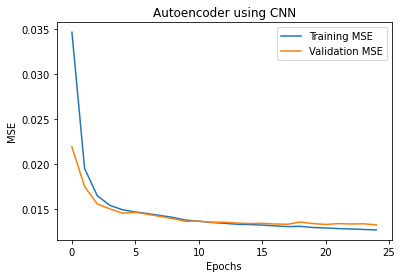

In [12]:
plt.plot(history3.history['mse'], label = "Training MSE")
plt.plot(history3.history['val_mse'], label = "Validation MSE")
plt.title("Autoencoder using CNN")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()

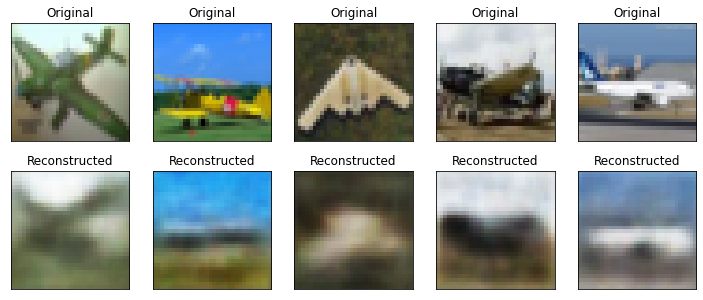

In [11]:
rec_images = model3.predict(test_2_images)

plt.figure(figsize=(25,5))
for i in range(3,8):
  plt.subplot(2,10,i+1-3)
  plt.imshow(test_2_images[i], cmap=plt.cm.binary)
  plt.title('Original')
  plt.xticks([])
  plt.yticks([])
  plt.subplot(2,10,i+11-3)
  plt.imshow(rec_images[i], cmap=plt.cm.binary)
  plt.title('Reconstructed')
  plt.xticks([])
  plt.yticks([])
plt.show()

**Observations**<br>
On using CNN as autoencoder, the images are reconstructed but due to the bottleneck dense layer with very small number of nodes between encoder and deocder, the reconstructed images are blurry with slightly high MSE. This is possibly becuase of loss of information due to the bottleneck. If we increase the number of nodes in bottleneck layer, the performance will improve, but the cost of high training time. So there is a tradeoff.

# **Model 4**

In [113]:
model4 = model1_2
model4.layers

In [114]:
model4.layers[0].trainable = False
model4.summary()
history4 = model4.fit(train_2_images, train_2_labels, epochs = 25, batch_size = 32, validation_data = (val_2_images, val_2_labels), verbose = 2)

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 7200)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               3686912   
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 1026      
Total params: 3,688,834
Trainable params: 3,687,938
Non-trainable params: 896
_________________________________________

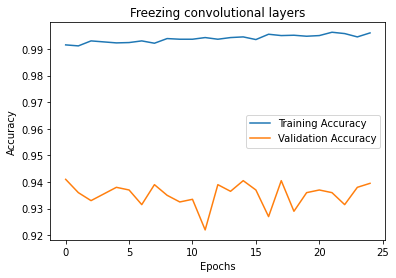

In [115]:
plt.plot(history4.history['accuracy'], label = "Training Accuracy")
plt.plot(history4.history['val_accuracy'], label = "Validation Accuracy")
plt.title("Freezing convolutional layers")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [116]:
loss4, acc4 = model4.evaluate(test_2_images, test_2_labels, verbose = 2)

63/63 - 1s - loss: 0.3673 - accuracy: 0.9440


**Observations**<br>
On freezing the convolutional layers and refitting the dense layer for classification, the model get more parameters to elarn from so its training accuracy increases. The validation accuracy also improves over model 1, but it cannot match the training accuracy. Neither does the validation MSE keep on decreasing (overfitting), nor does it keep on increasing. It keeps oscillating in a small range, denoting that the model is close to saturation where it would neither train more nor degrade due to overfitting. The overall performance improves slightly over model 1 as seen by test accuracy.

# **Model 5**

In [16]:
model3.layers

In [17]:
model5 = models.Sequential()
for layer in model3.layers[:-1]:
  model5.add(layer)
model5.layers

In [18]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               819300    
_________________________________________________________________
dense_1 (Dense)              (None, 8192)              827392    
_________________________________________________________________
reshape (Reshape)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)       

In [19]:
model5.layers[0].trainable=False
model5.layers[6].trainable=False
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               819300    
_________________________________________________________________
dense_1 (Dense)              (None, 8192)              827392    
_________________________________________________________________
reshape (Reshape)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)       

In [20]:
model5.add(layers.Flatten())
model5.add(layers.Dense(2, activation='softmax'))
model5.summary()
model5.compile(optimizer = 'RMSprop', loss=losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history5 = model5.fit(train_2_images, train_2_labels, epochs=25, validation_data=(val_2_images, val_2_labels), batch_size=32, verbose=2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               819300    
_________________________________________________________________
dense_1 (Dense)              (None, 8192)              827392    
_________________________________________________________________
reshape (Reshape)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)       

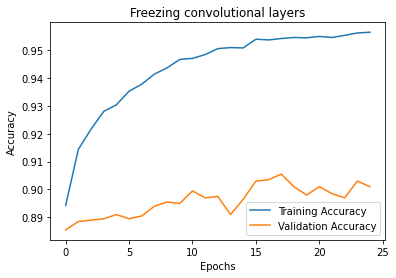

In [21]:
plt.plot(history5.history['accuracy'], label = "Training Accuracy")
plt.plot(history5.history['val_accuracy'], label = "Validation Accuracy")
plt.title("Freezing convolutional layers")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [22]:
loss5, acc5 = model5.evaluate(test_2_images, test_2_labels, verbose = 2)

63/63 - 1s - loss: 0.4048 - accuracy: 0.9060


**Observations**<br>
Here, we are freezing the convolutional layers of the autoencoder in model 3 and refitting the dense layers in model 3 along with new added dense output layer here. The peformance degradation due to the bottleneck in model 3 carries forward in this model, so it gives a clasiification accuracy slightly poorer than that with a simple CNN. 

# **Model 6**

In [35]:
model6 = models.Sequential()
for layer in model4.layers[:-1]:
  model6.add(layer)
model6.add(layers.Dense(10, activation='softmax'))
model6.layers

In [37]:
model6.layers[4].trainable = False
model6.summary()
model6.compile(optimizer = 'RMSprop', loss = losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
history6 = model6.fit(train_images, train_labels, epochs = 25, batch_size = 32, validation_data = (val_images, val_labels), verbose = 2)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               3686912   
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
Total params: 3,692,938
Trainable params: 5,130
Non-trainable params: 3,687,808
_______________________________________

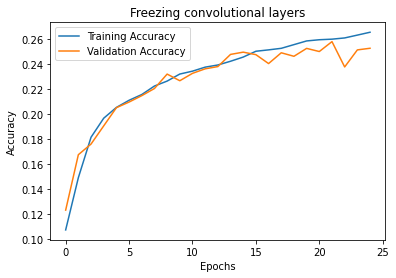

In [38]:
plt.plot(history6.history['accuracy'], label = "Training Accuracy")
plt.plot(history6.history['val_accuracy'], label = "Validation Accuracy")
plt.title("Fraeezing convolutional layers")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [39]:
loss6, acc6 = model6.evaluate(test_images, test_labels, verbose = 2)

313/313 - 4s - loss: 2.1966 - accuracy: 0.2644


**Observations**<br>
On freezing the model used for 2 class classification and simply adding a dense layer that fit on a dataset with 10 classes, obviously the accuracy is very poor. This is because no convolution is being done here to extract the features and hence the models learns nothing about the new 8 classes. So it is bound to give low accuracy.

# **CUSTOM MODEL**

In [8]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 2)
modelc = models.Sequential()
modelc.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(32, 32, 3)))
modelc.add(layers.Dropout(0.5))
modelc.add(layers.MaxPooling2D((2, 2)))
modelc.add(layers.Conv2D(16, (3, 3), activation = 'relu', input_shape=(32, 32, 3)))
modelc.add(layers.Dropout(0.5))
modelc.add(layers.MaxPooling2D((2, 2)))
modelc.add(layers.Flatten())
modelc.add(layers.Dense(512, activation = 'relu'))
modelc.add(layers.Dense(2, activation = 'softmax'))
modelc.summary()
modelc.compile(optimizer = 'adam', loss = losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
historyc = modelc.fit(train_2_images, train_2_labels, batch_size = 32, epochs = 25, validation_data = (val_2_images, val_2_labels), verbose = 2, callbacks = [callback])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 16)        4624      
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 16)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)              

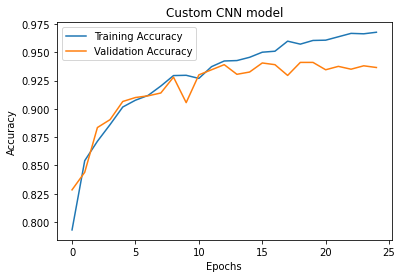

In [10]:
plt.plot(historyc.history['accuracy'], label = "Training Accuracy")
plt.plot(historyc.history['val_accuracy'], label = "Validation Accuracy")
plt.title("Custom CNN model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [11]:
lossc, accc = modelc.evaluate(test_2_images, test_2_labels, verbose = 2)

63/63 - 1s - loss: 0.3690 - accuracy: 0.9480


**Observations**<br>
In order to improme performance of the model, an additional convolutional layer with kernel size 3 is added (since that is optimal kernel size with best performance) with 16 channels for faster computation. Then, dropout regularisation is added to avoid overfitting after increasing the depth of the network. Additionally, adam optimizer is used for faster convergence. This model gives superior accuracy as comapred to any of the previous models. The same idea can be extended for classification on entire dataset and not just 2 - class classification given sufficient training time. 